In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

from ISOLLE import ISOLLE

from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils.graph_shortest_path import graph_shortest_path
import warnings
import networkx as nx

# Neighbors’ graphs of the swissroll

In [11]:
X, y = datasets.samples_generator.make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

### $\epsilon$-graph

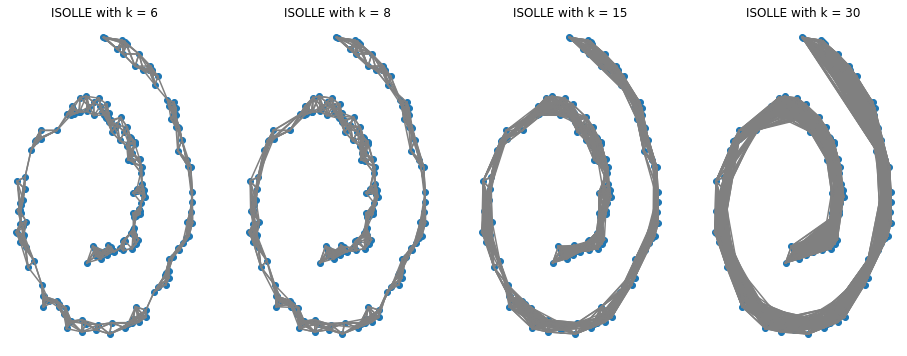

Wall time: 12.5 s


In [12]:
%%time
fig = plt.figure(figsize=(16, 6))
for ind_plot, k in zip(range(1, 5), [6, 8, 15, 30]):
    plt.subplot(1, 4, ind_plot)
    isolle = ISOLLE(X, k, 3, k_n_graph = False, sparsity = True)
    isolle.plot_neighbors_graph_2d(fig=True)
    
plt.show()

### K-graph

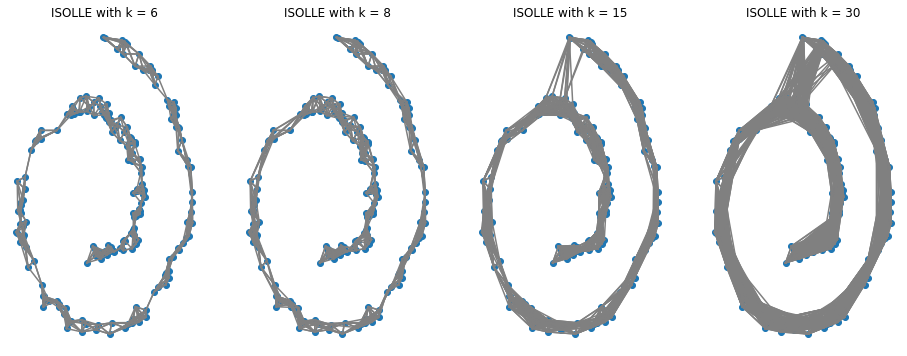

Wall time: 10.9 s


In [13]:
%%time
fig = plt.figure(figsize=(16, 6))
for ind_plot, k in zip(range(1, 5), [6, 8, 15, 30]):
    plt.subplot(1, 4, ind_plot)
    isolle = ISOLLE(X, k, 3, k_n_graph = True, k_n_geodesic = 10, sparsity = True)
    isolle.plot_neighbors_graph_2d(fig=True)
    
plt.show()

# Swiss Roll

In [10]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples=2000, random_state = 2456)

Text(0.5, 0, 'Z Label')

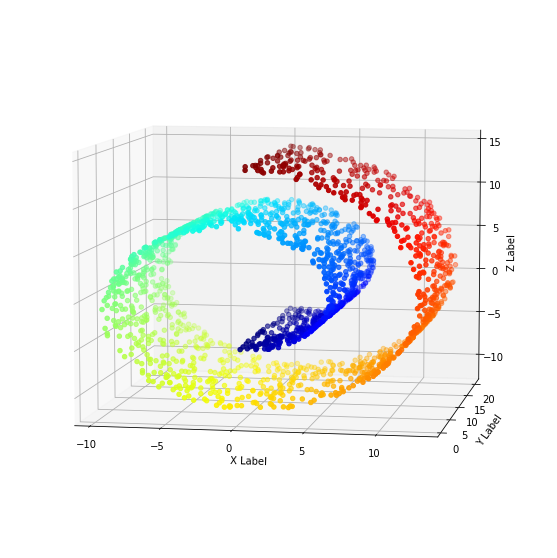

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### ISOLLE

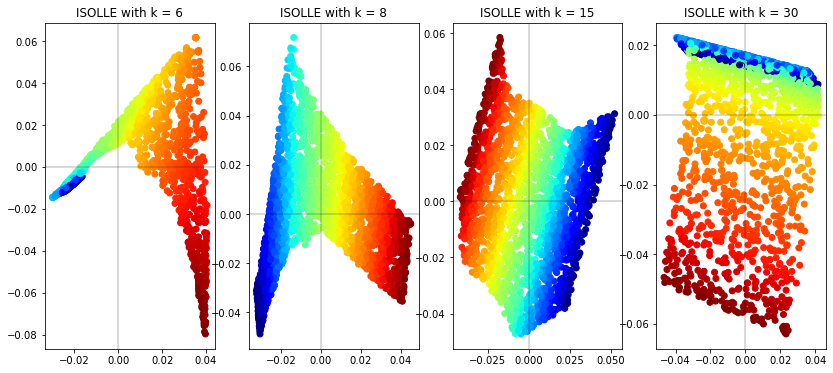

Wall time: 26 s


In [12]:
%%time
fig = plt.figure(figsize=(14, 6))
for ind_plot, k in zip(range(1, 5), [6, 8, 15, 30]):
    plt.subplot(1, 4, ind_plot)
    isolle = ISOLLE(X, k, 3, k_n_graph = True, k_n_geodesic = 14, sparsity = True)
    t = isolle.transform()
    
    plt.axhline(c = 'black', alpha = 0.2)
    plt.axvline(c = 'black', alpha = 0.2)
            
    plt.scatter(t[:, 0], t[:, 1], c = color, cmap=plt.cm.jet)
    plt.grid(False)
    plt.title('ISOLLE with k = {}'.format(k))
    
plt.show()

<br>

# S curve

In [64]:
X, color = datasets.make_s_curve(1000)

Text(0.5, 0, 'Z Label')

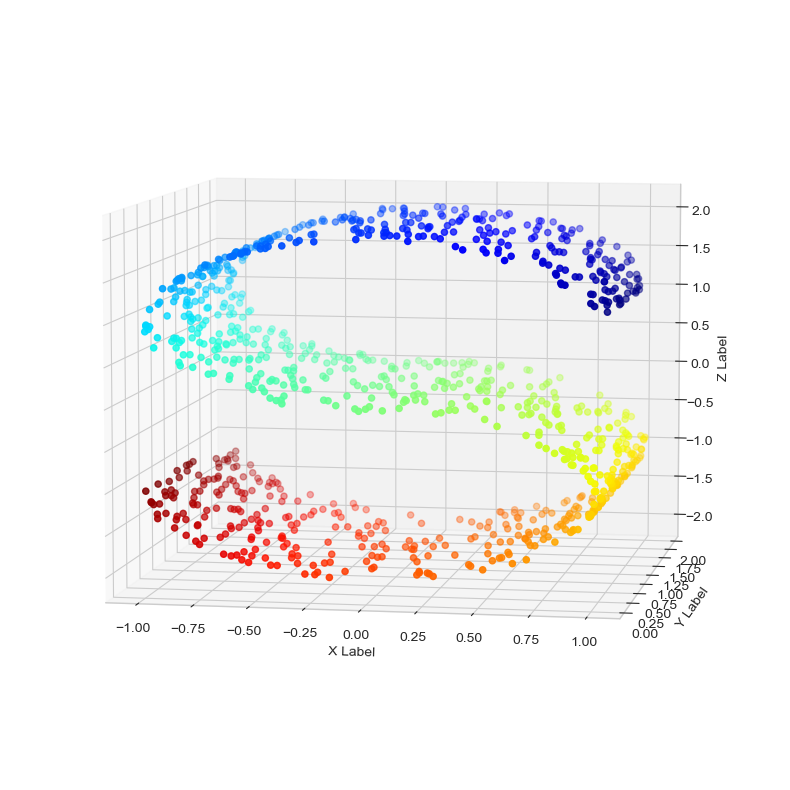

In [65]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### ISOLLE

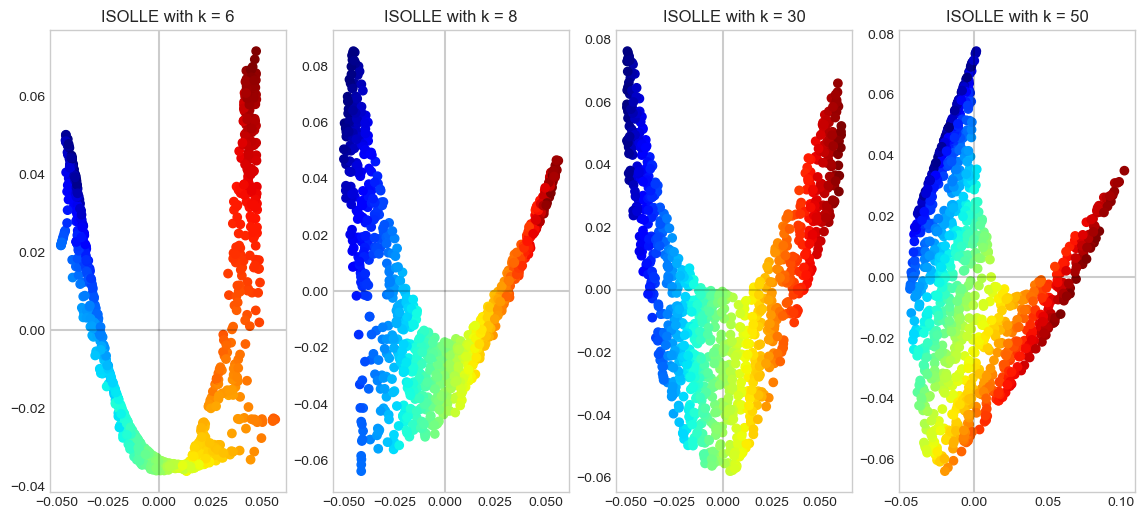

Wall time: 14.1 s


In [66]:
%%time
fig = plt.figure(figsize=(14, 6))
for ind_plot, k in zip(range(1, 5), [6, 8, 30, 50]):
    plt.subplot(1, 4, ind_plot)
    isolle = ISOLLE(X, k, 3, k_n_graph = True, k_n_geodesic = 12, sparsity = True)
    t = isolle.transform()
    
    plt.axhline(c = 'black', alpha = 0.2)
    plt.axvline(c = 'black', alpha = 0.2)
            
    plt.scatter(t[:, 0], t[:, 1], c = color, cmap=plt.cm.jet)
    plt.grid(False)
    plt.title('ISOLLE with k = {}'.format(k))
    
plt.show()

<br>

# Sphere

In [27]:
# Dataset taken from Manifold Learning: Introduction and Foundational Algorithms; Drew Wilimitis
# https://github.com/drewwilimitis/Manifold-Learning
import math
n = 1000
phi = np.random.uniform(0, 2*math.pi, n)
costheta = np.random.uniform(-1, 1, n)
u = np.random.uniform(0, 1, n)

theta = np.arccos(costheta)
r = u**(1/3)
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)
PH = np.vstack([x, y, z]).T

Text(0.5, 0, 'Z Label')

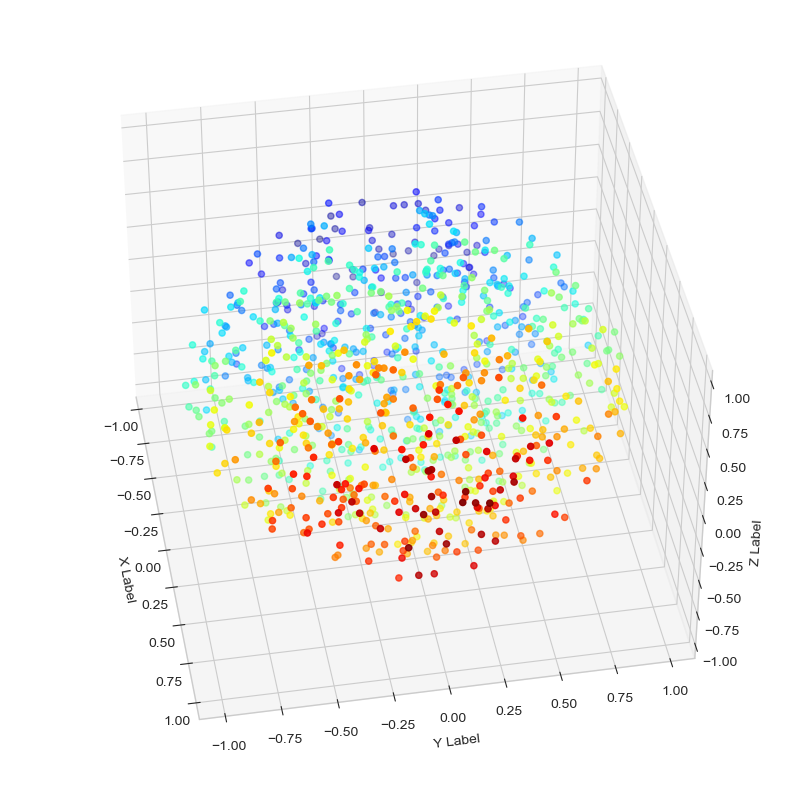

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, -10)
ax.scatter(PH[:, 0], PH[:, 1], PH[:, 2], c=x, cmap=plt.cm.jet)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### ISOLLE

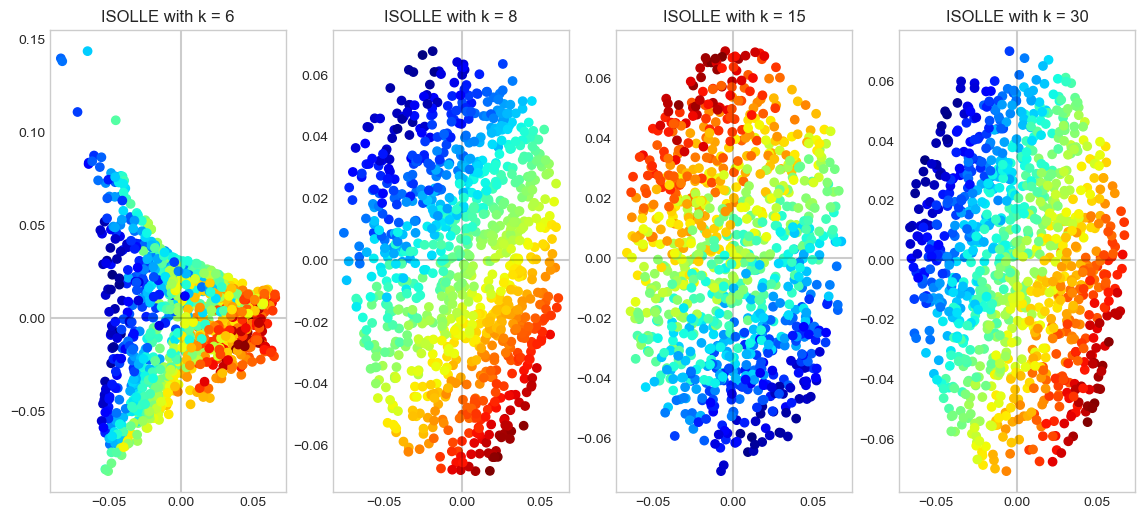

Wall time: 7.79 s


In [29]:
%%time
fig = plt.figure(figsize=(14, 6))
for ind_plot, k in zip(range(1, 5), [6, 8, 15, 30]):
    plt.subplot(1, 4, ind_plot)
    isolle = ISOLLE(PH, k, 3, k_n_graph = True, k_n_geodesic = 12, sparsity = True)
    t = isolle.transform()
    
    plt.axhline(c = 'black', alpha = 0.2)
    plt.axvline(c = 'black', alpha = 0.2)
            
    plt.scatter(t[:, 0], t[:, 1], c = x, cmap=plt.cm.jet)
    plt.grid(False)
    plt.title('ISOLLE with k = {}'.format(k))
    
plt.show()

<br>

#  Twin peaks dataset

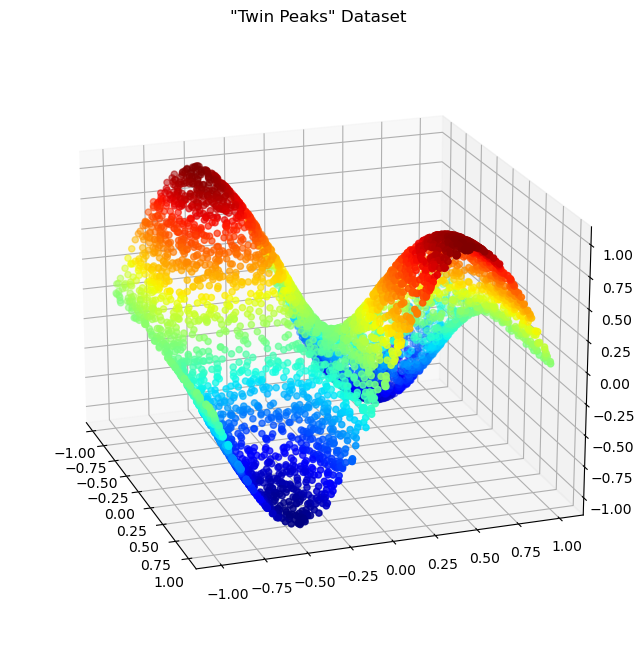

In [23]:
# Dataset taken from Isomap; Drew Wilimitis
# https://github.com/drewwilimitis/Manifold-Learning
plt.style.use('default')
n = 5000
param = 1
xy = 1 - 2 * np.random.rand(2, n)
p = np.array([xy[1, :], xy[0, :], param * np.sin(np.pi * xy[0, :]) * np.tanh(3 * xy[1, :])]).T
color = p[:, 2]
fig = plt.figure(figsize = (9, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[:, 0], p[:, 1], p[:, 2], c=color, cmap=plt.cm.jet)
plt.title('"Twin Peaks" Dataset', size=12)
ax.view_init(20, -19);

### ISOLLE

In [24]:
isolle = ISOLLE(p, 19, 3)
t = isolle.transform()

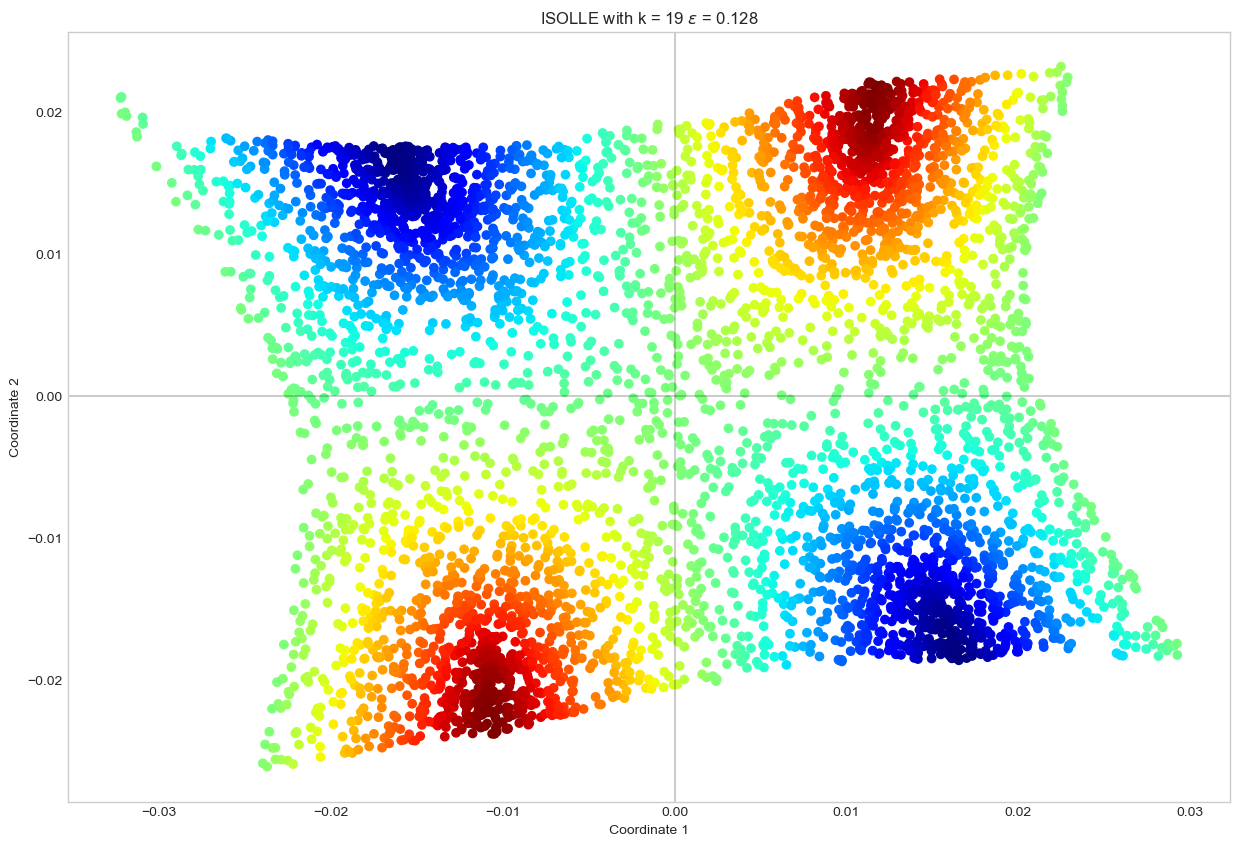

In [25]:
isolle.plot_embedding_2d(color, grid = False, cmap = plt.cm.jet, size = (15, 10) )

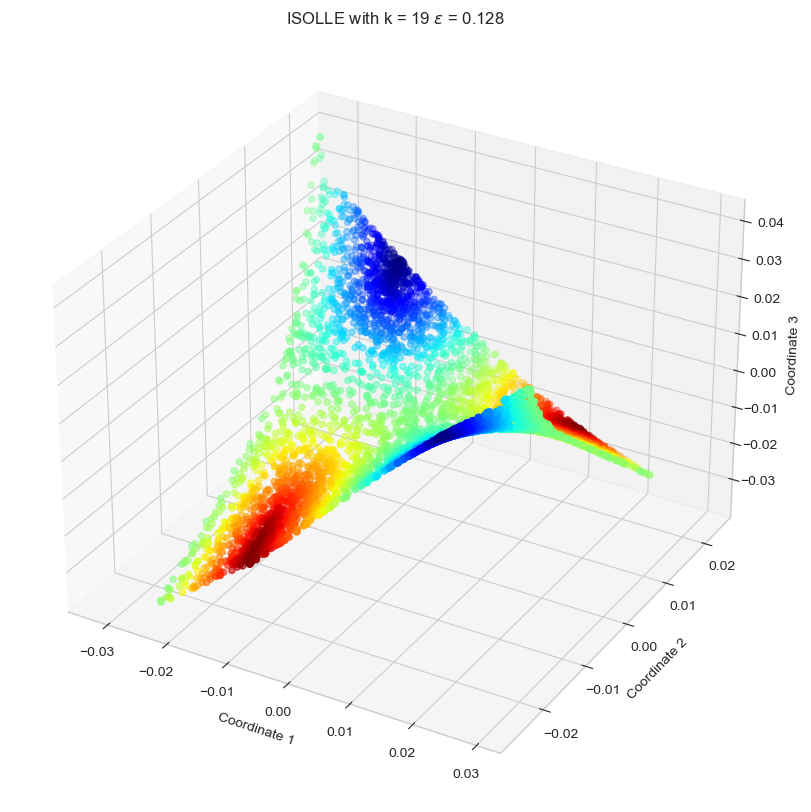

In [26]:
isolle.plot_embedding_3d(color, grid = False, cmap = plt.cm.jet, size = (15, 10) )